<a href="https://colab.research.google.com/github/TechieTeee/Amazing_Alchemy/blob/master/NFT_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Necesary Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
pd.options.display.max_rows
pd.options.display.max_rows = 500
pd.options.display.max_rows

500

# **Upload Data from Local Storage**

In [4]:
#Load CSV File of Data into the Google Colab Environment
from google.colab import files
upload = files.upload()

Saving nft_sales_v3004.csv to nft_sales_v3004.csv


In [5]:
#Store Data into Dataframe for Local Notebook Space
df = pd.read_csv('nft_sales_v3004.csv')

# **Explore Data**

In [6]:
#Dataframe Head
df.head()

,Collections,Sales,Buyers,Txns,Owners
0,Axie Infinity,"$4,065,032,779","1,724,932","15,829,552","2,560,082"
1,CryptoPunks,"$2,219,339,345","5,489","20,892","3,634"
2,Bored Ape Yacht Club,"$1,918,212,623","10,878","28,329",NaN
3,Mutant Ape Yacht Club,"$1,357,836,830","19,663","36,153",NaN
4,Art Blocks,"$1,234,293,195","28,912","153,656","33,996"


In [7]:
#Shape of Dataset
df.shape

(250, 5)

In [8]:
#List Column Names
list(df.columns.values)

['Collections', 'Sales', 'Buyers', 'Txns', 'Owners']

In [9]:
#Datatypes
df.dtypes

Collections    object
Sales          object
Buyers         object
Txns           object
Owners         object
dtype: object

In [10]:
#Dataframe Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Collections  250 non-null    object
 1   Sales        250 non-null    object
 2   Buyers       250 non-null    object
 3   Txns         250 non-null    object
 4   Owners       122 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [11]:
#Dataframe Description
df.describe()

,Collections,Sales,Buyers,Txns,Owners
count,250,250,250,250,122
unique,250,250,248,250,116
top,Axie Infinity,"$4,065,032,779","4,541","15,829,552",1
freq,1,1,2,1,7


In [12]:
#Find the duplicates
#All patients are unique- just sanity check
df.duplicated().sum()

0

In [16]:
#Find null values
df.isnull().sum()
#SES and MMSE have all of the missing values. SES contains the majority of the missing values.

Collections      0
Sales            0
Buyers           0
Txns             0
Owners         128
dtype: int64

# **Data Viz**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AttributeError: ignored

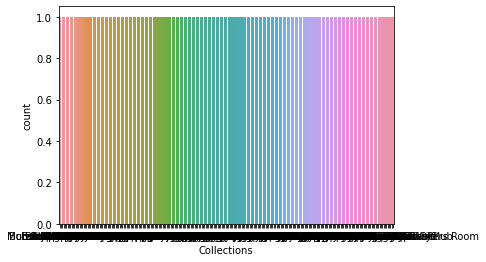

In [17]:
#Plot the Unique values CDR
sns.countplot(df['Collections']).unique()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AttributeError: ignored

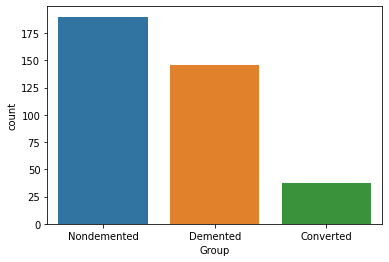

In [ ]:
#Plot the Unique values Group
sns.countplot(df['Group']).unique()

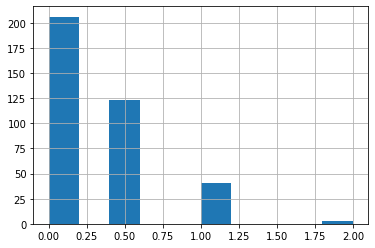

In [ ]:
#Histogram of the CDR Distributions
df.CDR.hist()

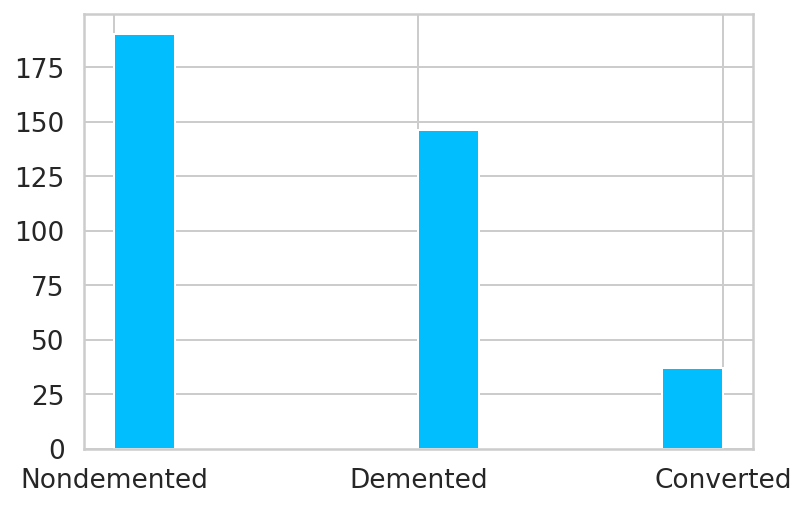

In [ ]:
#Histogram of the Group Distributions
df.Group.hist()

In [ ]:
#CDR Value Counts
df.CDR.value_counts()

0.0    206
0.5    123
1.0     41
2.0      3
Name: CDR, dtype: int64

In [ ]:
#Group Value Counts
df.Group.value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

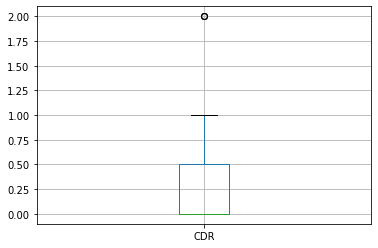

In [ ]:
#Boxplot of CDR distribution
df[['CDR']].boxplot()

# **EDA Part 2: Feature Importance and Correlation Between Features**

**Boruta Wrapper: Feature Importance**
Ran in R Studio Cloud and will put code output here.


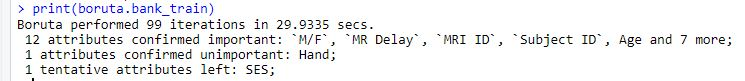

**Correlation between Variables**

In [ ]:
#Correlation Table
df.corr()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Visit,1.000000,0.920009,0.183213,0.024615,-0.051622,-0.029078,0.002325,0.117428,-0.126682,-0.120399
MR Delay,0.920009,1.000000,0.205357,0.051630,-0.030813,0.065844,-0.062915,0.119624,-0.105586,-0.123545
Age,0.183213,0.205357,1.000000,-0.027886,-0.046857,0.055612,-0.026257,0.042348,-0.518359,-0.035067
EDUC,0.024615,0.051630,-0.027886,1.000000,-0.722647,0.194884,-0.153121,0.257015,-0.012200,-0.241752
SES,-0.051622,-0.030813,-0.046857,-0.722647,1.000000,-0.149219,0.076160,-0.261575,0.090095,0.255576
MMSE,-0.029078,0.065844,0.055612,0.194884,-0.149219,1.000000,-0.686519,-0.032084,0.341912,0.040052
CDR,0.002325,-0.062915,-0.026257,-0.153121,0.076160,-0.686519,1.000000,0.022819,-0.344819,-0.029340
eTIV,0.117428,0.119624,0.042348,0.257015,-0.261575,-0.032084,0.022819,1.000000,-0.210122,-0.988877
nWBV,-0.126682,-0.105586,-0.518359,-0.012200,0.090095,0.341912,-0.344819,-0.210122,1.000000,0.213476
ASF,-0.120399,-0.123545,-0.035067,-0.241752,0.255576,0.040052,-0.029340,-0.988877,0.213476,1.000000


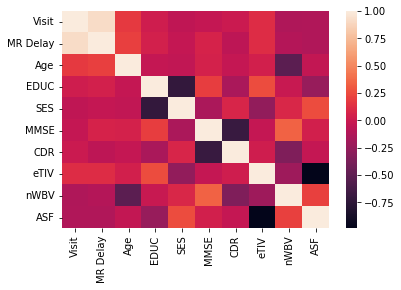

In [ ]:
#Correlation plot
sns.heatmap(df.corr())